# Analysis

### Request the ohsome API

Question: How many buildings were mapped with RapID (Microsoft buildings) in every country?

#### Import libs

In [82]:
import json
import os
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Get the data for required region

In [2]:
base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
url = base_url + endpoint

with open(f"test_countries.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    "filter": "building=* and building!=no and geometry:polygon",
    "groupByKey": "source",
    "groupByValues": "microsoft/BuildingFootprints",
    "format": "json",
    "time": "2020-01-01/2023-01-01/P1Y",
}
headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"

response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print("Response:")
print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()['groupByResult']


Response:
{
    "attribution": {
        "url": "https://ohsome.org/copyrights",
        "text": "\u00a9 OpenStreetMap contributors"
    },
    "apiVersion": "1.9.0",
    "groupByResult": [
        {
            "groupByObject": [
                "feature1",
                "remainder"
            ],
            "result": [
                {
                    "timestamp": "2020-01-01T00:00:00Z",
                    "value": 395155.0
                },
                {
                    "timestamp": "2021-01-01T00:00:00Z",
                    "value": 470680.0
                },
                {
                    "timestamp": "2022-01-01T00:00:00Z",
                    "value": 629701.0
                },
                {
                    "timestamp": "2023-01-01T00:00:00Z",
                    "value": 753591.0
                }
            ]
        },
        {
            "groupByObject": [
                "feature1",
                "source=microsoft/BuildingFootprints"

### Get the data for every continent

#### Define the url

In [3]:
base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
url = base_url + endpoint

#### Define the function to generate the data

In [69]:
def data_gen(name):

    with open(f"{geojson_dir}{name}", "r") as file:
        bpolys = json.load(file)


    parameters = {
        "bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
        "filter": "building=* and building!=no and geometry:polygon",
        "groupByKey": "source",
        "groupByValues": "microsoft/BuildingFootprints",
        "format": "json",
        "time": "2020-01-01/2023-01-01/P1Y",
    }
    headers = {
        "accept": "application/json",
        "Content-Type": "application/x-www-form-urlencoded",
    }

    for value in parameters.values():
        assert value != "", "Please provide values for the parameters"

    response = requests.post(url, data=parameters, headers=headers)
    response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

    print("Response:")
    print(json.dumps(response.json(), indent=4))  # Pretty print response

    result = response.json()["groupByResult"]
    return result


#### Get the names of regions/geojson files

In [70]:
work_dir = os.getcwd()
work_dir_2 = os.getcwd()
geojson_dir = os.path.join(work_dir_2, "geojson_files", "")

geojson_names = []
for (dir_path, dir_names, file_names) in os.walk(geojson_dir):  # give the path
    geojson_names.extend(file_names)
print(geojson_names)


['Africa.geojson', 'Antarctica.geojson', 'Asia.geojson', 'Australia.geojson', 'Europe.geojson', 'North America.geojson', 'Oceania.geojson', 'South America.geojson']


#### Get the required data by the geojson files (not overhelm the server)

In [72]:
os.chdir(geojson_dir) # change the working directory because of geojson files

data = []

for geojson_name in geojson_names:

    data.append(data_gen(geojson_name))

os.chdir(work_dir) # change the working directory back

#### Save the json data and load

In [51]:
with open("continents_data_20-23_ai.json", "w") as file:
    json.dump(data, file, indent=4)

In [63]:
with open("continents_data_20-23_ai.json", "r") as f:
    data = json.load(f)


In [64]:
data

[[{'groupByObject': [0, 'remainder'],
   'result': [{'timestamp': '2020-01-01T00:00:00Z', 'value': 54298403.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 67423672.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 80187816.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 92934713.0}]},
  {'groupByObject': [0, 'source=microsoft/BuildingFootprints'],
   'result': [{'timestamp': '2020-01-01T00:00:00Z', 'value': 0.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 219212.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 269849.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 2598077.0}]}],
 [{'groupByObject': [6, 'remainder'],
   'result': [{'timestamp': '2020-01-01T00:00:00Z', 'value': 774.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 815.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 1011.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 1054.0}]},
  {'groupByObject': [6, 'source=microsoft/BuildingFootprints'],
   'result': [{'times

#### Edit the obtained data into desired shape to create a DataFrame

In [65]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [66]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
df

,feature,source,timestamp,value
0,0,remainder,2020-01-01T00:00:00Z,54298403.0
1,0,remainder,2021-01-01T00:00:00Z,67423672.0
2,0,remainder,2022-01-01T00:00:00Z,80187816.0
3,0,remainder,2023-01-01T00:00:00Z,92934713.0
4,0,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0
...,...,...,...,...
59,5,remainder,2023-01-01T00:00:00Z,15766540.0
60,5,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0
61,5,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0
62,5,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,12590.0


In [67]:
# Export the data to excel
# df.to_excel("example.xlsx", index=False)

In [68]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
# df = df.sort_values("timestamp")

## Plot the results

#### Filter the data

In [114]:
df_ai = df.loc[(df["source"] == "source=microsoft/BuildingFootprints") , :] # buiildings used from Microsoft AI
# df_ai #& (df["feature"] == 5)
df_rem = df.loc[(df["source"] == "remainder"),:] # remainder = manually mapped buildings
df_rem

,feature,source,timestamp,value
0,0,remainder,2020-01-01 00:00:00+00:00,54298403.0
1,0,remainder,2021-01-01 00:00:00+00:00,67423672.0
2,0,remainder,2022-01-01 00:00:00+00:00,80187816.0
3,0,remainder,2023-01-01 00:00:00+00:00,92934713.0
8,6,remainder,2020-01-01 00:00:00+00:00,774.0
9,6,remainder,2021-01-01 00:00:00+00:00,815.0
10,6,remainder,2022-01-01 00:00:00+00:00,1011.0
11,6,remainder,2023-01-01 00:00:00+00:00,1054.0
16,1,remainder,2020-01-01 00:00:00+00:00,82922953.0
17,1,remainder,2021-01-01 00:00:00+00:00,98392669.0


#### Plots

In [149]:
# labels for graph legend
labels = {0:"Africa",
            1:"Asia",
            2:"Australia",
            3:"North America",
            4:"Oceania",
            5:"South America",
            6:"Antarctica",
            7:"Europe",
            }

Text(0, 0.5, 'Number of buildings')

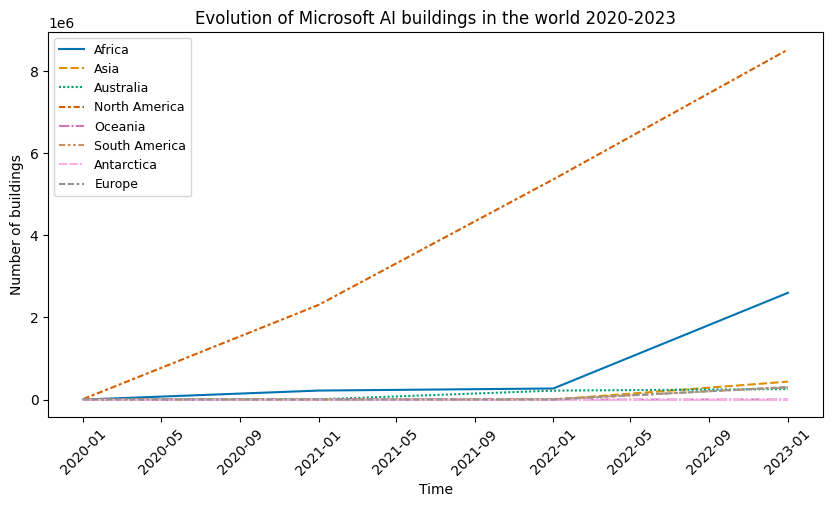

In [150]:
plt.figure(figsize=(10,5))
plt.title("Evolution of Microsoft AI buildings in the world 2020-2023")

# plot the data
sns.lineplot(x='timestamp', y='value', hue='feature', data=df_ai,
             palette='colorblind', style='feature',
             hue_order=labels.keys(),
             style_order=labels.keys())
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)

# set the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, [labels[key] for key in labels.keys()], fontsize=9)

# set x and y axis labels
plt.xlabel("Time")
plt.ylabel("Number of buildings")


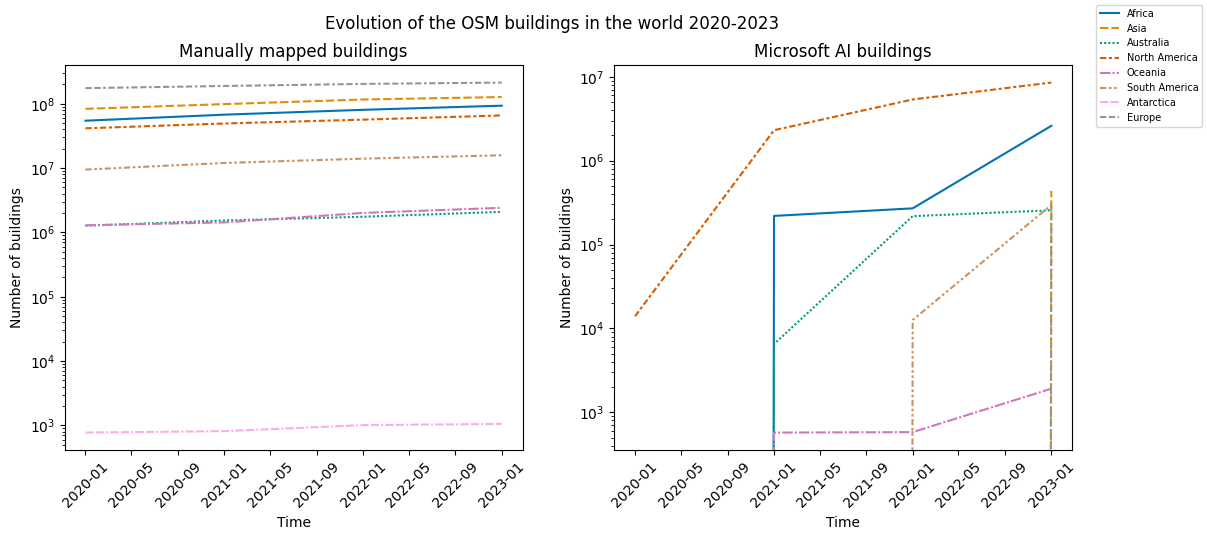

In [155]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))
fig.suptitle("Evolution of the OSM buildings in the world 2020-2023")

# create a Seaborn plot on the first subplot
sns.lineplot(x='timestamp', y='value', hue='feature', data=df_rem, ax=ax1,
             palette='colorblind', style='feature',
             hue_order=labels.keys(),
             style_order=labels.keys())

# create another Seaborn plot on the second subplot
sns.lineplot(x='timestamp', y='value', hue='feature', data=df_ai, ax=ax2,
             palette='colorblind', style='feature',
             hue_order=labels.keys(),
             style_order=labels.keys())

# set the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
ax2.legend(handles, [labels[key] for key in labels.keys()], fontsize=7)
ax1.legend().remove()
ax2.legend().remove()

ax1.set_yscale("log")
ax2.set_yscale("log")

# Set titles for each subplot
ax1.set_title("Manually mapped buildings")
ax2.set_title("Microsoft AI buildings")

ax1.set_xlabel("Time")
ax1.set_ylabel("Number of buildings")

ax2.set_xlabel("Time")
ax2.set_ylabel("Number of buildings")

# rotate x-axis labels for both subplots
for ax in [ax1, ax2]:
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.tick_params(axis='x', labelrotation=45)

fig.legend(handles, [labels[key] for key in labels.keys()], fontsize=7)
